In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [2]:
# 처음 5줄을 봅니다.
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [3]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [5]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [6]:
df[['pregnant', 'class']].groupby(['pregnant']).mean()

,class
pregnant,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


In [7]:
# 데이터 가공하기 : 임신횟수와 당뇨병 발병 확률
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


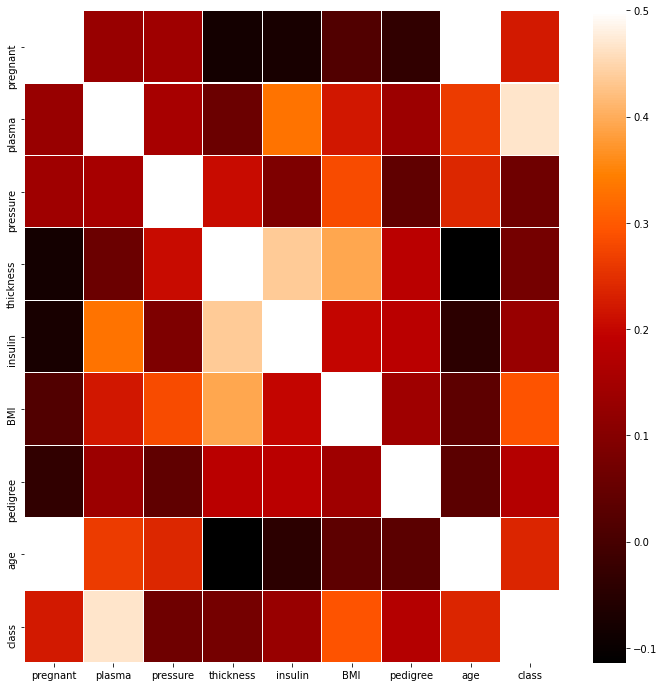

In [14]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white')
plt.show()

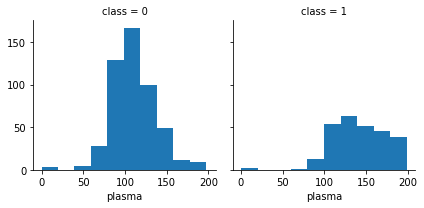

In [9]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

In [10]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8].astype(float)
Y = dataset[:,8].astype(float)

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11

77/77 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7344
Epoch 84/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7305
Epoch 85/200
77/77 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7461
Epoch 86/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7513
Epoch 87/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7500
Epoch 88/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7500
Epoch 89/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7474
Epoch 90/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7357
Epoch 91/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7305
Epoch 92/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7513
Epoch 93/200


In [11]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt("./dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8].astype(float)
Y = dataset[:,8].astype(float)

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 2s 3ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 3ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11

77/77 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7695
Epoch 165/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7591
Epoch 166/200
77/77 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7760
Epoch 167/200
77/77 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.7721
Epoch 168/200
77/77 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7630
Epoch 169/200
77/77 [==============================] - 0s 4ms/step - loss: 0.4698 - accuracy: 0.7721
Epoch 170/200
77/77 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.7630: 0s - loss: 0.4748 - accuracy: 
Epoch 171/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7669
Epoch 172/200
77/77 [==============================] - 0s 3ms/step - loss

In [12]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt("./dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8].astype(float)
Y = dataset[:,8].astype(float)

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Epoch 1/200
77/77 [==============================] - 2s 4ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 4ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 4ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 3ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 4ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11

77/77 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7695
Epoch 165/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7591
Epoch 166/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7760
Epoch 167/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.7721
Epoch 168/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7630
Epoch 169/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7721
Epoch 170/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7630
Epoch 171/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7669
Epoch 172/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7695
Epoc

In [13]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8].astype(float)
Y = dataset[:,8].astype(float)

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


FileNotFoundError: [Errno 2] No such file or directory: '../dataset/pima-indians-diabetes.csv'

In [ ]:
import numpy as np

np.logspace(0,5,10)

In [ ]:
model.summary()